In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import show
import scipy as sp
import glob
import os

# Wrangling 2016
- glob the 2016 week 1-7 files together, with extra columns Location, Week, and Year
- Dropping Ratings that is #REF! or NaN
- Merging the two scheduling questions together
- Rename columns
- Casting Pacing as int category
- Make rating integer and then scale by 2 to get range from 0-10
- Drop columns I don't care about (Timestamps and stuff)

#### glob the 2016 week 1-7 files together, with extra columns Location, Week, and Year

In [2]:
path = './SAFeedback1617/2016/'
files = glob.glob(os.path.join(path,'A*.csv'))
df_ea = (pd.read_csv(f).assign(Location = os.path.basename(f).split(' ')[-1].split('.')[0]
                              , Week = os.path.basename(f).split(' ')[2]
                              , Year = 2016) for f in files)
conc_df1 = pd.concat(df_ea, ignore_index=True, sort=True)

In [3]:
conc_df1.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Location,Timestamp,Unnamed: 0,Week,What track are you in?,Year
0,NaN,3,3,Taipei,8/5/2016 1:39:41,NaN,7,NaN,2016
1,NaN,3,4,Taipei,8/5/2016 1:40:47,NaN,7,NaN,2016
2,NaN,3,4,Taipei,8/5/2016 1:40:50,NaN,7,NaN,2016
3,NaN,4,4,Taipei,8/5/2016 1:42:44,NaN,7,NaN,2016
4,NaN,4,5,Taipei,8/5/2016 1:45:13,NaN,7,NaN,2016


#### Dropping Ratings that is #REF! or NaN

In [4]:
conc_df1 = conc_df1.replace('#REF!', np.nan)
conc_df1 = conc_df1.dropna(subset=['How would you rate your overall satisfaction with the Summer Academy this week?'])

#### Merging the two scheduling questions together

In [5]:
conc_df1 = conc_df1.assign(Pacing = conc_df1['How well are the tutorials paced?'].fillna(conc_df1['How well is the schedule paced?']))
conc_df1 = conc_df1.assign(TimeStamp = conc_df1['Timestamp'].fillna(conc_df1['Unnamed: 0']))

#### Casting Pacing as int category

In [6]:
conc_df1['Pacing'] = conc_df1['Pacing'].astype('int')
conc_df1['Pacing'] = conc_df1['Pacing'].astype('category')

#### Rename columns

In [7]:
conc_df1 = conc_df1.rename(index = str, columns = {"How would you rate your overall satisfaction with the Summer Academy this week?": "Rating", "What track are you in?": "Track"})

#### Make rating integer and then scale by 2 to get range from 0-10

In [8]:
conc_df1['Rating'] = conc_df1['Rating'].astype('int')
conc_df1['Rating'] = conc_df1['Rating']*2

#### Drop unwanted columns

In [9]:
conc_df1 = conc_df1.drop(['How well are the tutorials paced?', 'How well is the schedule paced?','Timestamp','Unnamed: 0','TimeStamp'], axis = 1)

- Change pacing into a category variable, with descriptions consistent with 2017
- Making week into int category and track into category
- Rename SG to Singapore and casts location into category
- Make location abbreviations to words to make consistent with 2017

#### Change pacing into a category variable, with descriptions consistent with 2017

In [10]:
conc_df1['Pacing'] = conc_df1['Pacing'].cat.rename_categories(['Way too slow', 'A little too slow',
                                                              'Just right', 'A little too fast',
                                                              'Way too fast'])

#### Making week into int category and track into category

In [11]:
conc_df1['Week'] = conc_df1['Week'].astype('int')
conc_df1['Week'] = conc_df1['Week'].astype('category')

In [12]:
conc_df1['Track'] = conc_df1['Track'].astype('category')

#### Rename SG to Singapore and casts location into category

In [13]:
conc_df1.loc[conc_df1['Location'] == 'SG',['Location']] = 'Singapore'
conc_df1['Location'] = conc_df1['Location'].astype('category')
conc_df1['Location'].cat.categories

Index(['HK', 'LA', 'NY', 'SF', 'SV', 'Singapore', 'Taipei', 'Tokyo'], dtype='object')

#### Make location abbreviations to words to make consistent with 2017

In [14]:
locdict = {'HK': 'Hong Kong', 'LA': 'Los Angeles', 'NY': 'New York City', 'SF': 'San Francisco'
          , 'SV':'Sunnyvale', 'Singapore': 'Singapore', 'Taipei': 'Taipei', 'Tokyo': 'Tokyo'}

In [15]:
conc_df1['Location'] = conc_df1['Location'].cat.rename_categories(locdict)

#### Now just to check the 2016 results (bar week 8)

In [16]:
conc_df1.head()

,Rating,Location,Week,Track,Year,Pacing
0,6,Taipei,7,NaN,2016,Just right
1,8,Taipei,7,NaN,2016,Just right
2,8,Taipei,7,NaN,2016,Just right
3,8,Taipei,7,NaN,2016,A little too fast
4,10,Taipei,7,NaN,2016,A little too fast


In [17]:
conc_df1.describe(include='all')

,Rating,Location,Week,Track,Year,Pacing
count,926.00000,926,926.0,808,926.0,926
unique,NaN,8,7.0,4,NaN,5
top,NaN,Sunnyvale,1.0,Apps,NaN,Just right
freq,NaN,313,213.0,395,NaN,571
mean,8.38013,NaN,NaN,NaN,2016.0,NaN
std,1.58445,NaN,NaN,NaN,0.0,NaN
min,2.00000,NaN,NaN,NaN,2016.0,NaN
25%,8.00000,NaN,NaN,NaN,2016.0,NaN
50%,8.00000,NaN,NaN,NaN,2016.0,NaN
75%,10.00000,NaN,NaN,NaN,2016.0,NaN


# 2016 week 8
- drop unwanted columns
- rename columns for consistency
- put all of them in a 2016 dataframe

In [18]:
df2 = pd.read_csv('./SAFeedback1617/2016/Week 8 Feedback (2016, incomplete) - results.csv')
df2.head()

,#,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC),Network ID
0,00b836bda84e6bdbe780af97e249e59f,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04,3212b7a834
1,39dde6dc0e1e375845d756fc7e39fc5f,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04,f4954355aa
2,5e56b9de91670b308cb98dd2848b8739,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05,3d69ca289b
3,641081d05785b47a0f17448625da0d49,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06,261608f95d
4,c29bdd4f5678d78b450f4494e0f53c8c,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11,d6672ddf6f


In [19]:
df2 = df2.drop(['#','Start Date (UTC)','Submit Date (UTC)','Network ID'], axis = 1)

In [20]:
df2.loc[df2['location'] == 'New York',['location']] = 'New York City'
df2.loc[:,['track']] = df2['track'].apply(lambda x: x[6:])
df2 = df2.assign(Week = 8, Year = 2016)
df2 = df2.rename(index = str, columns = {"location":"Location", "track":"Track",
                                        "How likely is it that you would recommend the Make School Summer Academy to a friend?": "Rating"})

In [21]:
df2.head()

,Rating,Location,Track,Week,Year
0,10,New York City,Apps,8,2016
1,10,San Francisco,Intro,8,2016
2,10,New York City,Intro,8,2016
3,9,Sunnyvale,Apps (4-week),8,2016
4,3,San Francisco,Intro,8,2016


#### put all of them in 2016

In [22]:
df2016 = pd.concat((conc_df1, df2), ignore_index=True, sort=True)
df2016.head()

,Location,Pacing,Rating,Track,Week,Year
0,Taipei,Just right,6,NaN,7,2016
1,Taipei,Just right,8,NaN,7,2016
2,Taipei,Just right,8,NaN,7,2016
3,Taipei,A little too fast,8,NaN,7,2016
4,Taipei,A little too fast,10,NaN,7,2016


# Now for 2017
- Drop the entries with no ratings
- Rename the columns
- Make week format consistent
- Make a df with 2016 and 2017 together

In [23]:
df2017 = pd.read_csv('./SAFeedback1617/2017/Student Feedback Surveys-Superview.csv')
df2017 = df2017.assign(Year = 2017)
print(df2017.shape)
df2017.head()

(1453, 7)


,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,2017
1,36,Los Angeles,Apps,Week 1,4,A little too fast,2017
2,117,San Francisco,Games,Week 1,4,Way too slow,2017
3,253,NaN,NaN,Week 2,4,A little too fast,2017
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,2017


#### Drop the entries with no ratings

In [24]:
df2017 = df2017.replace('#ERROR!', np.nan)
df2017 = df2017.dropna(subset=['Rating (Num)'])
df2017 = df2017.drop(['ID'], axis = 1)

#### Rename the columns

In [25]:
df2017 = df2017.rename(index = str, columns={'Rating (Num)': 'Rating', 'Schedule Pacing': 'Pacing'})

#### Make week format consistent

In [26]:
df2017.loc[:,['Week']] = df2017['Week'].apply(lambda x: x[-1]).astype('int')

In [27]:
df2017['Rating'] = df2017['Rating'].astype('int')

In [28]:
df2017.head()

,Location,Track,Week,Rating,Pacing,Year
0,San Francisco,"Apps, Explorer",1,3,Just right,2017
1,Los Angeles,Apps,1,4,A little too fast,2017
2,San Francisco,Games,1,4,Way too slow,2017
3,NaN,NaN,2,4,A little too fast,2017
4,New York City,"Apps, Explorer",1,4,Just right,2017


### Make a df with 2016 and 2017 together

In [29]:
df1617 = pd.concat((df2016, df2017), ignore_index=True, sort=True)

In [30]:
df1617['Location'] = df1617['Location'].astype('category')
df1617['Pacing'] = df1617['Pacing'].astype('category')
df1617['Track'] = df1617['Track'].astype('category')
df1617['Year'] = df1617['Year'].astype('category')
df1617['Week'] = df1617['Week'].astype('category')

In [31]:
df1617.dtypes

Location    category
Pacing      category
Rating         int64
Track       category
Week        category
Year        category
dtype: object

In [32]:
df1617.describe(include='all')

,Location,Pacing,Rating,Track,Week,Year
count,2397,2376,2441.000000,2279,2441.0,2441.0
unique,15,5,NaN,8,8.0,2.0
top,San Francisco,Just right,NaN,Apps,1.0,2017.0
freq,684,1605,NaN,1293,501.0,1450.0
mean,NaN,NaN,8.408029,NaN,NaN,NaN
std,NaN,NaN,1.513817,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,8.000000,NaN,NaN,NaN
50%,NaN,NaN,8.000000,NaN,NaN,NaN
75%,NaN,NaN,10.000000,NaN,NaN,NaN


### Add columns indicating whether a feedback is promoter, passive, or detractor.
### Took the liberty and used rating score.
- Thus it is not strictly NPS

In [33]:
bins = [0.0, 6.0, 8.0, 10]
labels = [-1, 0, 1]
types = pd.cut(df1617["Rating"], bins, include_lowest=True, labels=labels)
df1617 = df1617.assign(Promoter = types)
df1617['Promoter'] = df1617.Promoter.astype('int')

### Try to see the number of responses by week

In [51]:
YLW = df1617.groupby(['Year', 'Location', 'Week']).Rating.count()
YLW.unstack().tail(10)

Week                   1     2     3     4     5     6     7    8
Year Location                                                    
2017 Chicago        10.0   8.0  12.0   9.0  12.0  11.0   8.0  NaN
     Hong Kong       6.0   5.0   NaN   NaN   NaN   NaN   NaN  NaN
     Los Angeles    14.0  16.0  17.0  13.0  12.0  12.0  14.0  8.0
     New York City  54.0  54.0  49.0  48.0  48.0  45.0  32.0  NaN
     Oakland         6.0   4.0  10.0   8.0   9.0   5.0   5.0  NaN
     Redwood City   10.0  10.0  10.0  10.0  10.0   7.0   1.0  NaN
     San Francisco  63.0  53.0  71.0  59.0  48.0  31.0  34.0  1.0
     Santa Clara    29.0  29.0  33.0  31.0  28.0  27.0  24.0  NaN
     Tokyo          27.0  28.0  10.0   NaN   NaN   NaN   NaN  NaN
     Washington DC  13.0  13.0   6.0   5.0   4.0   5.0   1.0  NaN

#### Explore 'NPS' by year

In [35]:
yearnps = df1617.groupby(['Year']).Promoter.mean()
df1617.groupby(['Year']).Promoter.count()

Year
2016     991
2017    1450
Name: Promoter, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


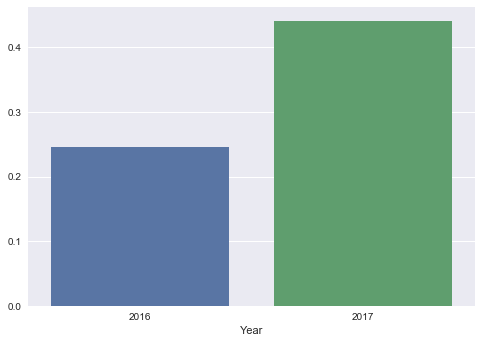

In [36]:
sns.barplot(x=yearnps.index, y=yearnps.values)
show()

#### problems from here on:
- One student have multiple inputs, and the number of inputs per student varies
- All other variables collapsed

#### Explore NPS by week

In [37]:
weeknps = df1617.groupby(['Week']).Promoter.mean()

In [38]:
df1617.groupby(['Week']).Promoter.count()

Week
1    501
2    437
3    336
4    293
5    309
6    268
7    223
8     74
Name: Promoter, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


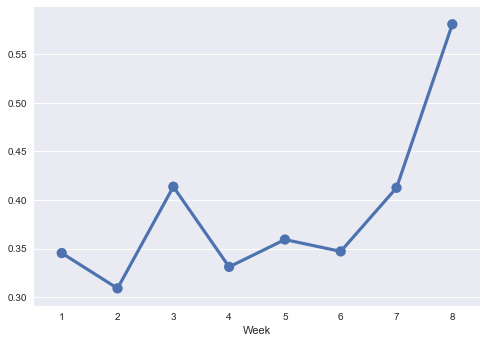

In [39]:
sns.pointplot(x=weeknps.index, y=weeknps.values)
show()

#### Explore location vs NPS

In [40]:
locationnps = df1617.groupby(['Location']).Promoter.mean()

In [41]:
df1617.groupby(['Location']).Promoter.count()

Location
Atlanta           33
Beijing           78
Chicago           70
Hong Kong         17
Los Angeles      168
New York City    511
Oakland           47
Redwood City      58
San Francisco    684
Santa Clara      201
Singapore         53
Sunnyvale        329
Taipei            23
Tokyo             78
Washington DC     47
Name: Promoter, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


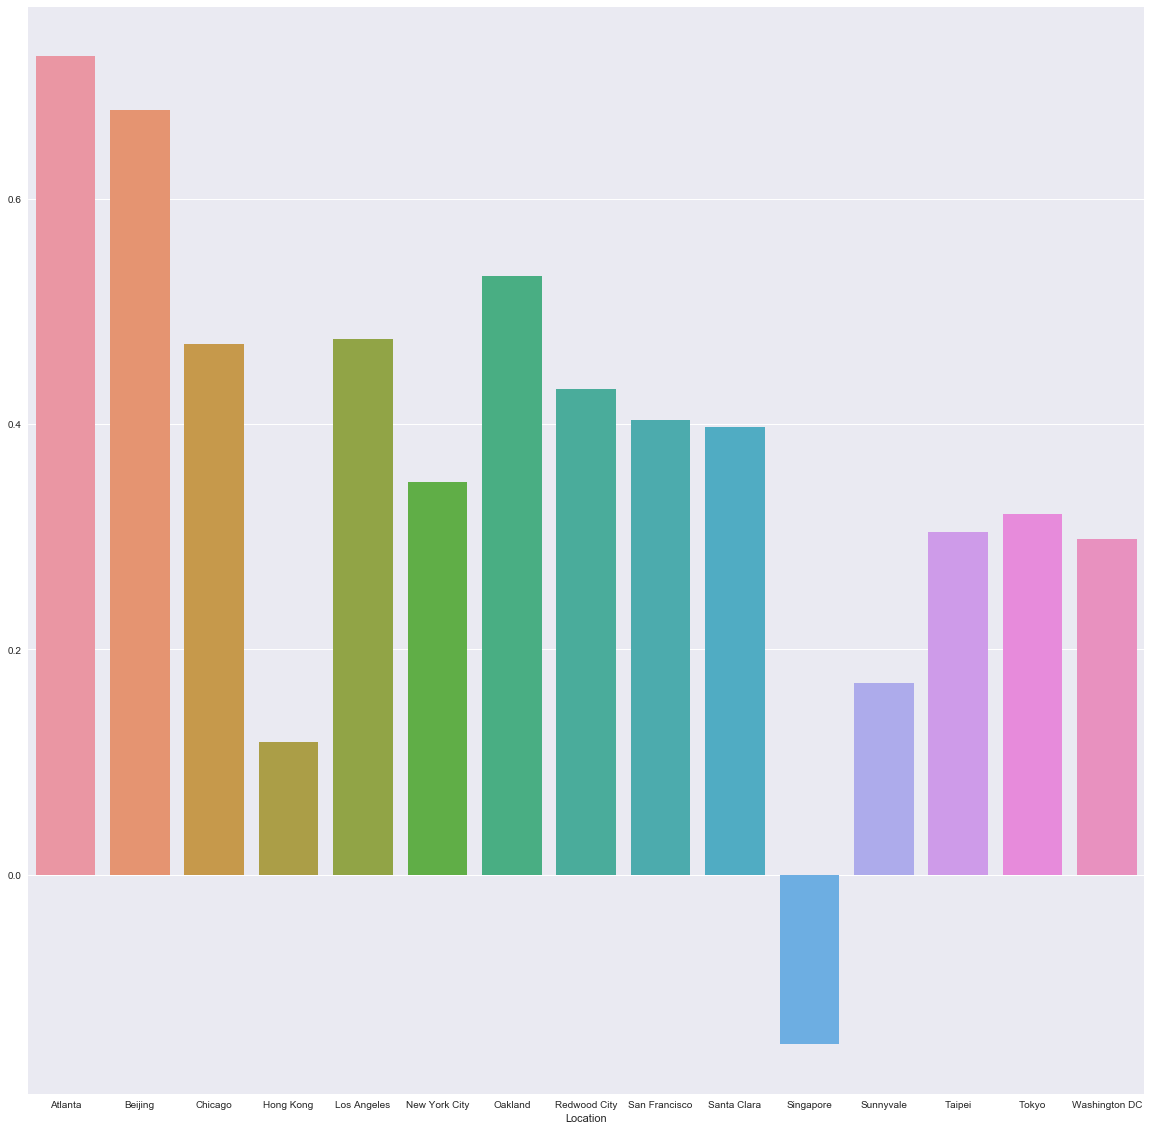

In [42]:
plt.subplots(figsize=(20, 20))
sns.barplot(x=locationnps.index, y=locationnps.values)
show()

#### Explore Track vs NPS

In [43]:
tracknps = df1617.groupby(['Track']).Promoter.mean()
df1617.groupby(['Track']).Promoter.count()

Track
Apps               1293
Apps (4-week)         3
Apps, Explorer      224
Games               410
Games (4-week)        2
Games, Explorer      43
Intro               211
VR                   93
Name: Promoter, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


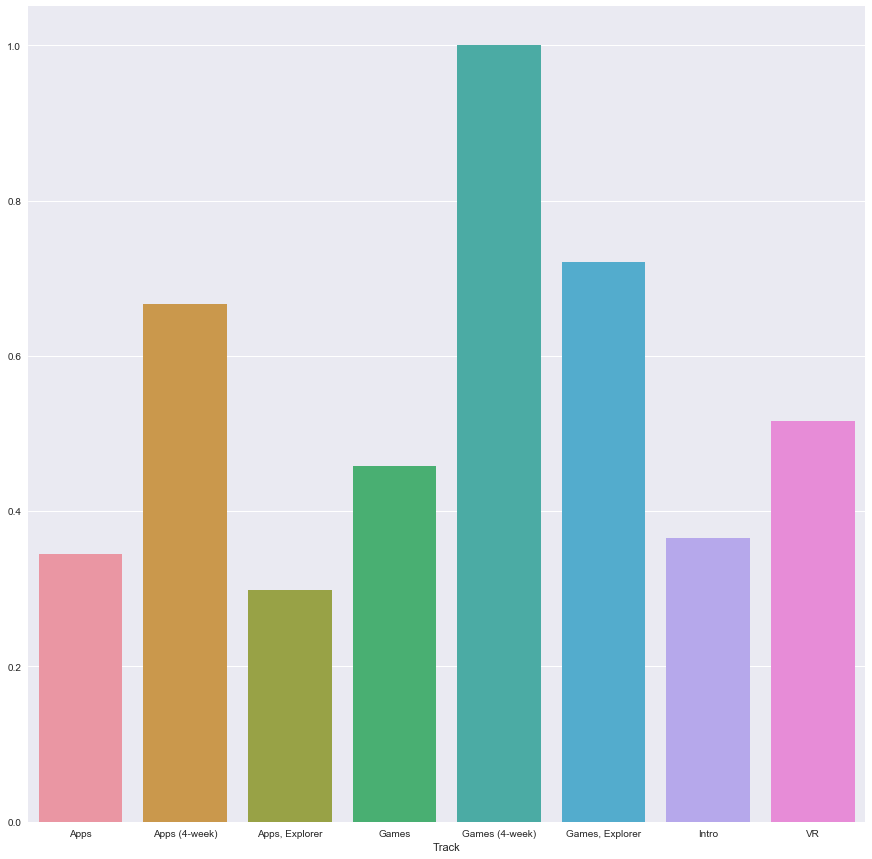

In [44]:
plt.subplots(figsize=(15,15))
sns.barplot(x=tracknps.index, y=tracknps.values)
show()

#### Explore Pacing vs NPS

In [45]:
pacingnps = df1617.groupby(['Pacing']).Promoter.mean()
df1617.groupby(['Pacing']).Promoter.count()

Pacing
A little too fast     536
A little too slow     159
Just right           1605
Way too fast           66
Way too slow           10
Name: Promoter, dtype: int64

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


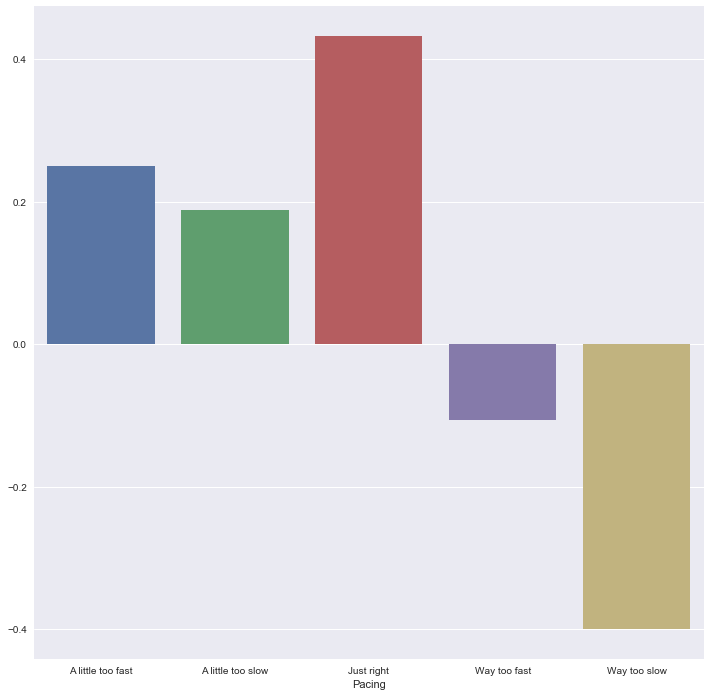

In [46]:
plt.subplots(figsize=(12,12))
sns.barplot(x=pacingnps.index, y=pacingnps.values)
show()

#### Can I plot the difference in pacing from 16 to 17?

In [47]:
ypr = df1617.groupby(['Year','Pacing']).Rating.count().unstack().fillna(0)
ypr = ypr.apply(lambda x: x/np.sum(x), axis=1)
yprs = ypr.stack()

In [48]:
yprs2017 = yprs[2017]
yprs2016 = yprs[2016]

/Users/fanggot/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


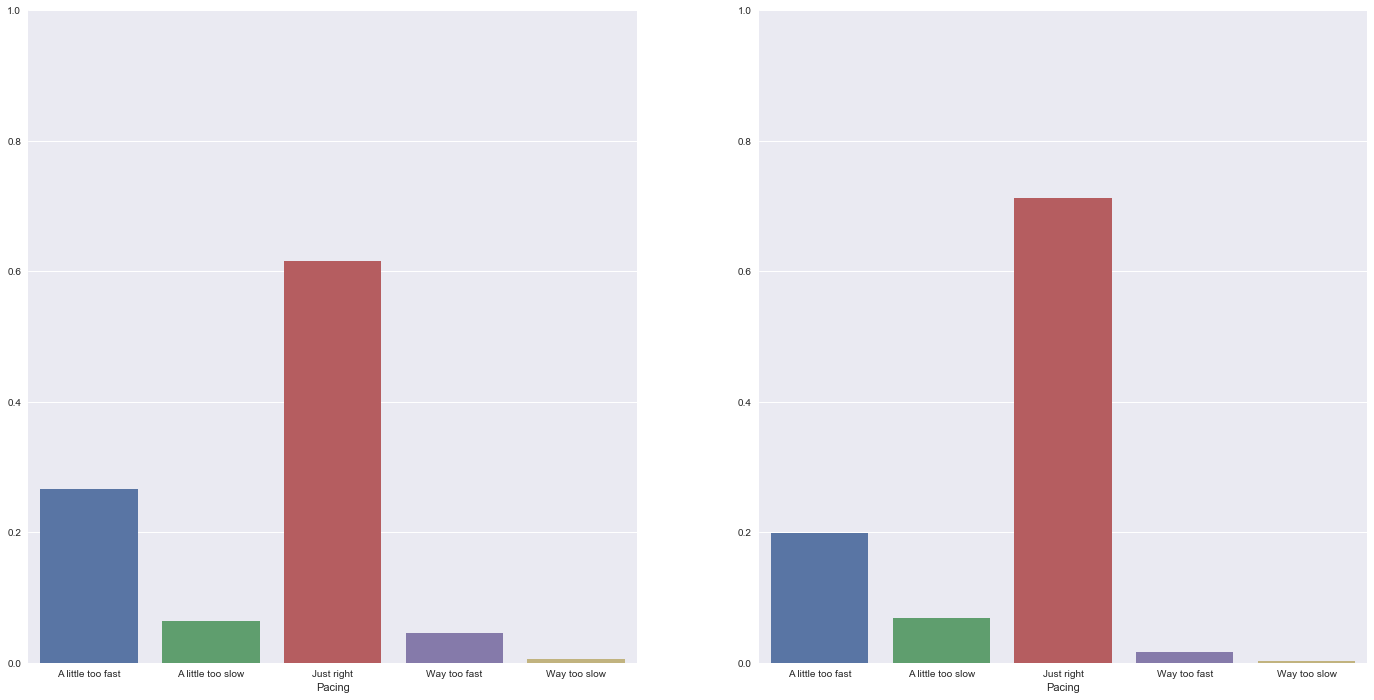

In [49]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,12))
ax1.set(ylim=(0, 1))
ax2.set(ylim=(0, 1))
sns.barplot(x=yprs2016.index, y=yprs2016.values, ax = ax1)
sns.barplot(x=yprs2017.index, y=yprs2017.values, ax = ax2)
show()

- What are things we could find here that could “help the business”?
- What sorts of information does this dataset contain?
- What kinds of questions might we be able to answer with this data?
- What kinds of questions can’t we answer with this data?
- What sorts of information might be actionable?
- How can you present your findings in a way that non-technical employees can understand and use to make decisions?